# 911 Calls Project

For this small project I will be analyzing some 911 call data from this [Kaggle link](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

    lat : String variable, Latitude
    lng: String variable, Longitude
    desc: String variable, Description of the Emergency Call
    zip: String variable, Zipcode
    title: String variable, Title
    timeStamp: String variable, YYYY-MM-DD HH:MM:SS
    twp: String variable, Township
    addr: String variable, Address
    e: String variable, Dummy variable (always 1)

# Data and import setup

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('911.csv')

In [8]:
#Dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [9]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


# Data cleanup

There are a lot of different reasons for calling 911 in this data set, but they can all be categorized into 3 main reaons: EMS (emergency medical services), Fire and Traffic.

In [4]:
#Number of unique 911 reasons
df['title'].nunique()

110

In [6]:
#Creating a new column with main reasons called 'Reason'
df['Reason'] = df['title'].apply(lambda title: title.split(':')[0])
df['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

C:\Users\SolveigFrank\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Reason', ylabel='count'>

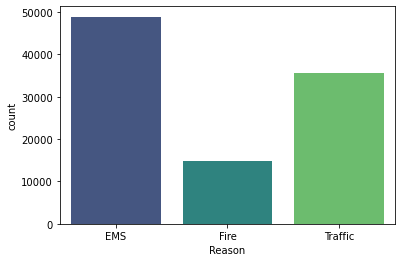

In [8]:
#Countplot for the reasons column
sns.countplot(df['Reason'],palette='viridis')

The timeStamp column is currently in a string format and needs to be converted to a DateTime object, to work with more easily.

In [9]:
type(df['timeStamp'][0])

str

In [10]:
#Converting to DateTime format
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [11]:
#Creating 3 new columns (Hour, Day of Week and Month) to make enable more plotting abilitites
df['Hour'] = df['timeStamp'].apply(lambda time:time.hour)
df['Day of Week'] = df['timeStamp'].apply(lambda time:time.dayofweek)
df['Month'] = df['timeStamp'].apply(lambda time:time.month)

Right now Day of Week gives back a number, so we can use .map a dictionary to easily apply the actual string names.

In [15]:
df['Day of Week']

0        3
1        3
2        3
3        3
4        3
        ..
99487    2
99488    2
99489    2
99490    2
99491    2
Name: Day of Week, Length: 99492, dtype: int64

In [16]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['Day of Week'] = df['Day of Week'].map(dmap)

In [17]:
df['Day of Week']

0        Thu
1        Thu
2        Thu
3        Thu
4        Thu
        ... 
99487    Wed
99488    Wed
99489    Wed
99490    Wed
99491    Wed
Name: Day of Week, Length: 99492, dtype: object

# Plotting by 911 call reason

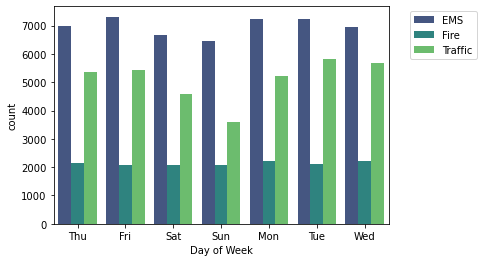

In [22]:
#Countplot showing Day of Week column with hue based on Reason
sns.countplot(x='Day of Week',data=df,hue='Reason',palette='viridis')
#Moving legend outside the plot for better visibility
plt.legend(bbox_to_anchor=(1.05, 1))

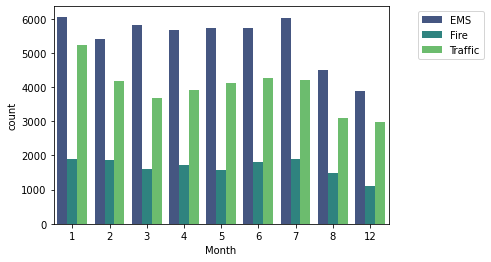

In [26]:
#Countplot for month with hue based on Reason
sns.countplot(x='Month',data=df,hue='Reason',palette='viridis')
plt.legend(bbox_to_anchor=(1.3, 1))